## Project 1

## <em> Markov chain Monte Carlo </em>
<br>
This notebook is arranged in cells. Texts are usually written in the markdown cells, and here you can use html tags (make it bold, italic, colored, etc). You can double click on this cell to see the formatting.<br>
<br>
The ellipsis (...) are provided where you are expected to write your solution but feel free to change the template (not over much) in case this style is not to your taste. <br>
<br>
<em>Hit "Shift-Enter" on a code cell to evaluate it.  Double click a Markdown cell to edit. </em><br>

<span style="color:blue"><i> Write your partner's name here (if you have one). </i></span> <br>

***
### Link Okpy

In [ ]:
from client.api.notebook import Notebook
ok = Notebook('project1_p3_U.ok')
_ = ok.auth(inline = True)

### Imports

In [1]:
import numpy as np
from scipy.integrate import quad
#For plotting
import matplotlib.pyplot as plt
%matplotlib inline

***

#### Problem 1 - Planck MCMC chain

Markov chain Monte Carlo is a general method based on drawing values of $\theta$ from approximate distributions and then correcting those draws to better aproximate the target posterior distribution. The sampling is done sequentially, wtih the distribution of the sampled draws depending on the last value drawn - hence, the draws from a Markov chain. (p. 275, <i>Bayesian Data Analysis</i>, Andrew Gelman et al.) (Remember that a sequence $x_1, x_2, ...$ of random events is called a Markov chain if $x_{n+1}$ depends explicitly on $x_{n}$ only (and not explicitly on previous steps).) Here, we consider six selected cosmologial parameters: [$H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau$], so the "chain" in this case is a random walk through the parameter space.
<br>
![alt text](MCMC.png "Title")
from https://github.com/KIPAC/StatisticalMethods/blob/master/chunks/montecarlo1.ipynb
<br><br>
As shown in the above figure, chains take time to converge to the target distribution, and you can determine the "burn-in" period, the number of sequences it takes to reach convergence.
<br><br>
In this problem, we provide you MCMC chains (using Planck low and high-$l$ temperature data with lensing reconstruction) from Planck Data Release 1 (http://irsa.ipac.caltech.edu/data/Planck/release_1/ancillary-data/). You can plot the chains in the parameter space and estimate the posterior distribution.
<br><br>
<i>References:</i><br>
Bayesian Data Analysis, Andrew Gelman et al.<br>
https://github.com/KIPAC/StatisticalMethods/blob/master/chunks/montecarlo1.ipynb
<br><br>
<span style="color:blue"> <i> 1. First, we give you one Planck chain without removing the burn-in. In this case, the parameter space is ($H_0, \Omega_b h^2$). Estimate the burn-in period. </i></span><br>


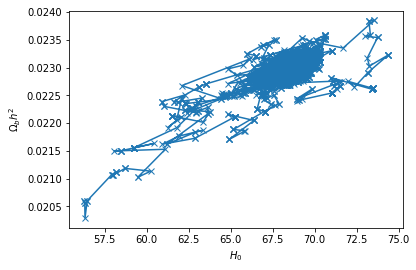

In [2]:
# Load data
data = np.loadtxt("Planck_chain_with_burnin.txt")
# H0
theta1 = data[:,23]
# Omega_b h^2
theta2 = data[:,2]

# Plot chain
plt.plot(theta1, theta2, 'x-')
plt.xlabel('$H_0$')
plt.ylabel('$\Omega_b h^2$')
plt.show()

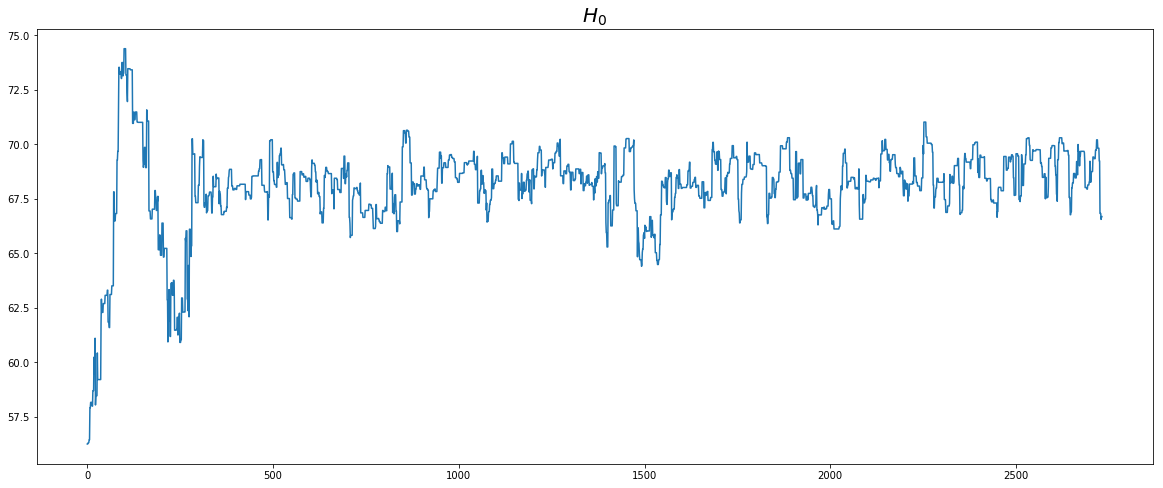

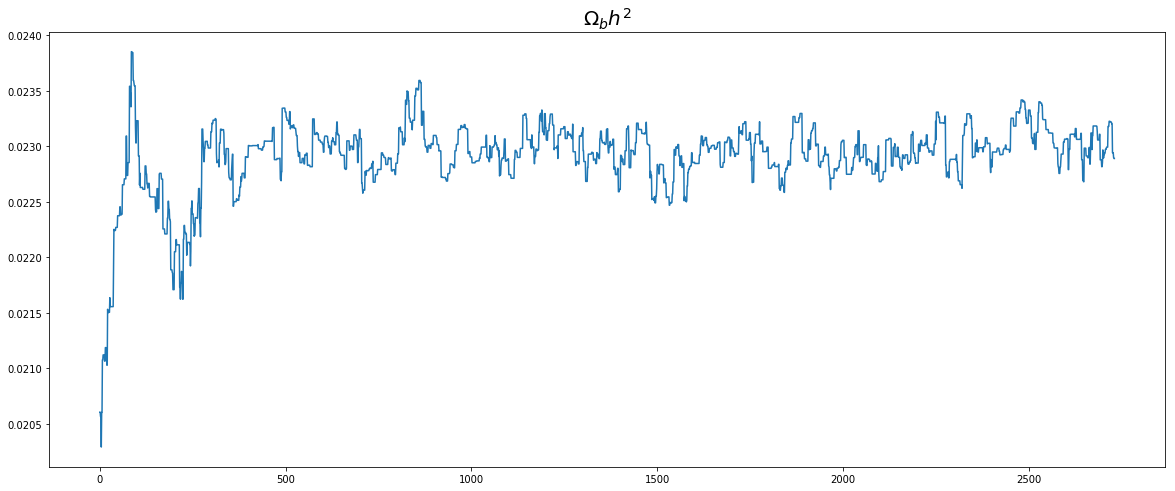

In [3]:
plt.figure(figsize = [20,8])
plt.title(r"$H_0$", size = 20)
plt.plot(range(theta1.size), theta1)
plt.show()

plt.figure(figsize = [20,8])
plt.title(r"$\Omega_b h^2$", size = 20)
plt.plot(range(theta2.size), theta2)
plt.show()


<span style="color:blue"> <i> Answer: </i></span><br><br>
We can estimate the burn-in phase as ~ 400 steps.<br>


<span style="color:blue"> <i> 2. Now, we provide you with 8 independent Planck MCMC chains. For each chain, we load the data for six cosmological parameters we are considering, [$H_0, \Omega_b h^2, \Omega_c h^2, n_s, A_s, \tau$]. From the chain, estimate the posterior distribution of each of the six parameters. (Plot the 1-d posterior distribution and estimate its mean + standard deviation.)  </i></span><br>

In [4]:
# Load data

# H_0
theta1_chain = np.zeros(shape=(8,1981))
# Omega_b h^2
theta2_chain = np.zeros(shape=(8,1981))
# Omega_c h^2
theta3_chain = np.zeros(shape=(8,1981))
# n_s
theta4_chain = np.zeros(shape=(8,1981))
# A_s
theta5_chain = np.zeros(shape=(8,1981))
# tau
theta6_chain = np.zeros(shape=(8,1981))

# 8 Planck chains, each of length 1981 (so theta6_chain[1] contains values of tau in Planck chain 1)
for i in range(8):
    data = np.loadtxt("base_planck_lowl_post_lensing_%d.txt" %(i+1))
    theta1_chain[i] = data[:,27][0:1981]
    theta2_chain[i] = data[:,2][0:1981]
    theta3_chain[i] = data[:,3][0:1981]
    theta4_chain[i] = data[:,6][0:1981]
    theta5_chain[i] = data[:,29][0:1981]*1.e-9
    theta6_chain[i] = data[:,5][0:1981]

In [5]:
theta = []
theta.append(theta1_chain); theta.append(theta2_chain); theta.append(theta3_chain); theta.append(theta4_chain); theta.append(theta5_chain); theta.append(theta6_chain) 
theta = np.array(theta)

In [7]:
from numpy.linalg import eigvals

from matplotlib.patches import Ellipse
import matplotlib as mpl

from scipy.stats import norm

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


1-d constraints:
H0 = 67.42 +/- 1.45 
Omega_b h^2 = 0.02208 +/- 0.00033 
Omega_c h^2 = 0.1196 +/- 0.0031 
n_s = 0.9617 +/- 0.0095 
A_s =  2.232e-09 +/- 1.6e-10 
tau = 0.09683 +/- 0.03825


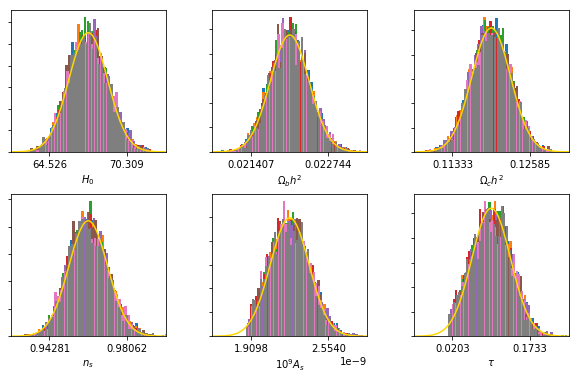

In [8]:
fig, axes = plt.subplots(2,3,figsize=(10,6))
fig.subplots_adjust(wspace=.3, hspace=.3)

p_tex = np.array([r'$H_0$', r'$\Omega_bh^2$',r'$\Omega_ch^2$',r'$n_s$',r'$10^9A_s$',r'$\tau$'])
mu_all = []
sig_all = []

for m in range(2):
    for n in range(3):
        ax = axes[m, n]
        ind = 3*m + n

        for i in range(8):
            ax.hist(theta[ind, :, :][i], bins = 40, histtype = 'bar', normed = True, rwidth = 0.8)

        mu = np.mean([np.mean(theta[ind, :, :][i]) for i in range(8)])
        sig = np.sqrt( np.mean([np.var(theta[ind, :, :][i]) for i in range(8)]) )

        xarr = np.linspace(mu-4*sig, mu+4*sig,101)
        yarr = norm.pdf(xarr, loc=mu, scale=sig)
        mu_all.append(mu)
        sig_all.append(sig)
        ax.plot(xarr,yarr, '-', color = 'gold')

        ax.set_xlabel(p_tex[ind], fontsize=10)

        ax.set_xlim(mu-4*sig, mu+4*sig)
        ax.set_xticks([mu-2*sig, mu+2*sig])
        ax.set_yticklabels([])

print('1-d constraints:')
print('H0 = %.2f +/- %.2f' % (mu_all[0], sig_all[0]), '\nOmega_b h^2 = %.5f +/- %.5f' % (mu_all[1], sig_all[1]), '\nOmega_c h^2 = %.4f +/- %.4f' % (mu_all[2], sig_all[2]), '\nn_s = %.4f +/- %.4f' % (mu_all[3],sig_all[3]), '\nA_s = ', np.around(mu_all[4], decimals = 12), '+/-', np.around(sig_all[4], decimals=11), '\ntau = %.5f +/- %.5f' % (mu_all[5], sig_all[5]))


<span style="color:blue"> <i> 3. For all pairs of the parameters, compute the covariance. Make a 2-d scatterplot of the chains (as in Problem3-Part 1). Then, plot 68% and 95% confidence ellipses on top of the scatterplots, as in Problem1-Part4. Compare your answers with Problem1-Part4 and Problem2-Part2. </i></span><br>

In [9]:
C = np.zeros([6, 6])

for i in range(6):
    for j in range(6):
        if i == j:
            C[i, i] = sig_all[i]**2
        else:
            cov_all = 0
            for n in range(8):
                cov = 0
                for m in range(len(theta[0][0])):
                    cov += (theta[i, :, :][n][m]-np.mean(theta[i, :, :][n]))*(theta[j, :, :][n][m]-np.mean(theta[j, :, :][n]))
                cov_all = cov_all + cov/len(theta[0][0])
            C[i, j] = cov_all/8.


/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


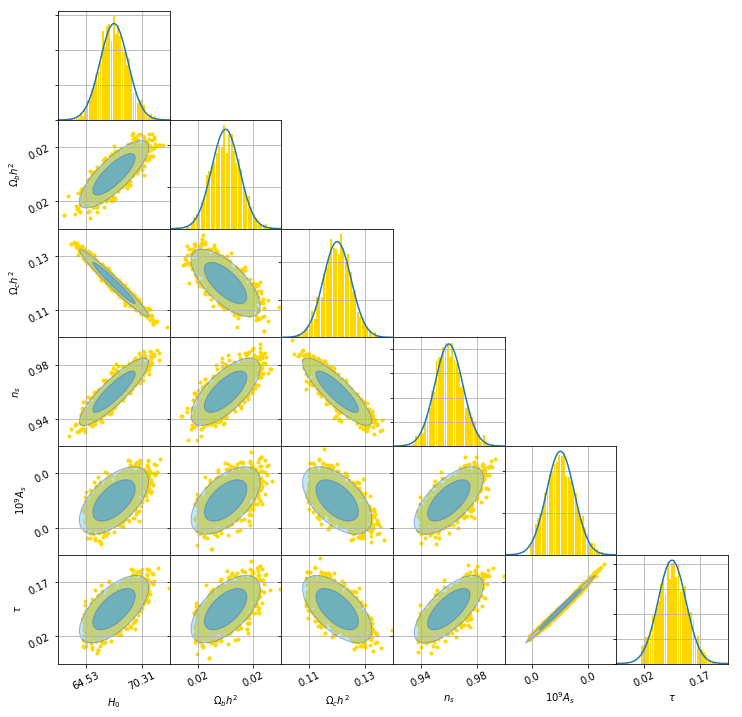

In [10]:
# Triangle Plot (Original code by Nicholas Kern)

fig, axes = plt.subplots(6,6,figsize=(12,12))
fig.subplots_adjust(wspace=0, hspace=0)

bounds = np.sqrt(C.diagonal()) * 4

p_tex = np.array([r'$H_0$', r'$\Omega_bh^2$',r'$\Omega_ch^2$',r'$n_s$',r'$10^9A_s$',r'$\tau$'])

for i in range(6):
    for j in range(6):
        ax = axes[i, j]
        if j > i:
            ax.axis('off')
            continue
        elif i == j:
            ax.grid(True)
            xarr = np.linspace(mu_all[i]-bounds[i],mu_all[i]+bounds[i],101)
            yarr = norm.pdf(xarr, loc=mu_all[i], scale=np.sqrt(C[i,i]))
            ax.plot(xarr,yarr)
            ax.set_xlim(mu_all[i]-bounds[i], mu_all[i]+bounds[i])
            ax.set_xticks([mu_all[i]-bounds[i]/2, mu_all[i]+bounds[i]/2])
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            
            for ii in range(1):
                ax.hist(theta[i, :, :][ii], bins = 40, histtype = 'bar', normed = True, rwidth = 0.8, color = 'gold')
        else:
            ax.grid(True)

            CovM = np.array([[C[i,i], C[i,j]],[C[i,j], C[j,j]]])

            eigvec, eigval, u = np.linalg.svd(CovM)

            semimaj = np.sqrt(eigval[0])*2.
            semimin = np.sqrt(eigval[1])*2.

            phi = np.arctan(eigvec[0][1]/eigvec[0][0])
            
            ax.scatter(theta[i][0], theta[j][0], marker='.', color = 'gold')
#             for uu in range(8):
#                 ax.scatter(theta[i][uu], theta[j][uu], marker='.')

            ell = mpl.patches.Ellipse(xy=[mu_all[i], mu_all[j]], width=1.52*semimaj, height=1.52*semimin, angle = phi*180/np.pi, facecolor = 'dodgerblue', edgecolor = 'royalblue', alpha = 0.5, label = '68% confidence')
            ell2 = mpl.patches.Ellipse(xy=[mu_all[i], mu_all[j]], width=2.48*semimaj, height=2.48*semimin, angle = phi*180/np.pi, facecolor = 'skyblue', edgecolor = 'royalblue', alpha = 0.5, label = '95% confidence')
            #             fig, ax = plt.subplots(figsize=(7,7))

            ax.add_patch(ell2)
            ax.add_patch(ell)
            
            ax.set_ylim(mu_all[j]-bounds[j], mu_all[j]+bounds[j])
            ax.set_xlim(mu_all[i]-bounds[i], mu_all[i]+bounds[i])
            ax.set_xticks([mu_all[i]-bounds[i]/2, mu_all[i]+bounds[i]/2])
            ax.set_yticks([mu_all[j]-bounds[j]/2, mu_all[j]+bounds[j]/2])
        

            
        if j != 0:
            ax.set_yticklabels([])
        if i != 5:
            ax.set_xticklabels([])
        if j == 0 and i !=0:
            ax.set_ylabel(p_tex[i], fontsize=10)
            ax.set_yticklabels([np.around(mu_all[i]-bounds[i]/2, decimals=2), np.around(mu_all[i]+bounds[i]/2, decimals=2) ])
            [tl.set_rotation(26) for tl in ax.get_yticklabels()]
        if i == 5:
            ax.set_xlabel(p_tex[j], fontsize=10)
            ax.set_xticklabels([np.around(mu_all[j]-bounds[j]/2, decimals=2), np.around(mu_all[j]+bounds[j]/2, decimals=2) ])
            [tl.set_rotation(26) for tl in ax.get_xticklabels()]
    

In MCMC, we need to make sure that chains converge to the posterior distribution. One useful test for convergence is "Gelman-Rubin statistic." For a given parameter, $\theta$, the $R$ statistic compares the variance across chains with the variance within a chain. Intuitively, if the chains are random-walking in very different places, i.e. not sampling the same distribution, $R$ will be large.<br><br>
In detail, given chains $J=1,\ldots,m$, each of length $n$,<br>
Let $B=\frac{n}{m-1} \sum_j \left(\bar{\theta}_j - \bar{\theta}\right)^2$, where $\bar{\theta_j}$ is the average $\theta$ for chain $j$ and $\bar{\theta}$ is the global average. This is proportional to the variance of the individual-chain averages for $\theta$.<br>
Let $W=\frac{1}{m}\sum_j s_j^2$, where $s_j^2$ is the estimated variance of $\theta$ within chain $j$. This is the average of the individual-chain variances for $\theta$.<br>
Let $V=\frac{n-1}{n}W + \frac{1}{n}B$. This is an estimate for the overall variance of $\theta$.<br><br>
Finally, $R=\sqrt{\frac{V}{W}}$.
We'd like to see $R\approx 1$ (e.g. $R < 1.1$ is often used). Note that this calculation can also be used to track convergence of combinations of parameters, or anything else derived from them. 
<br><br>
Reference: https://github.com/KIPAC/StatisticalMethods/blob/master/chunks/montecarlo1.ipynb
<br><br>
<span style="color:blue"> <i> 4. For all six parameters, compute $R$ and determine if the condition $R < 1.1$ is satisfied.  </i></span><br>

In [11]:
for ind in range(6):

    mu = [np.mean(theta[ind, :, :][i]) for i in range(8)]
    var = [np.var(theta[ind, :, :][i]) for i in range(8)]

    glob_mean = np.mean(mu)

    B = len(theta[0][0])/(8-1)*sum( (mu-glob_mean)**2 )

    W = 1./8.*sum( var )

    V = (len(theta[0][0])-1)/len(theta[0][0])*W + 1./len(theta[0][0])*B

    print('For', p_tex[ind], ', R =', np.sqrt(V/W))
print('')
print('The condition R < 1.1 is satisfied.')
print('')

For $H_0$ , R = 1.0000997779840044
For $\Omega_bh^2$ , R = 1.0003462428266958
For $\Omega_ch^2$ , R = 1.000086539535228
For $n_s$ , R = 1.0001271016443676
For $10^9A_s$ , R = 1.0004362350682507
For $\tau$ , R = 1.0003769561741416

The condition R < 1.1 is satisfied.



The autocorrelation of a sequence, as a function of lag, $k$, is defined thusly:
$$\rho_k = \frac{\sum_{i=1}^{n-k}\left(\theta_{i} - \bar{\theta}\right)\left(\theta_{i+k} - \bar{\theta}\right)}{\sum_{i=1}^{n-k}\left(\theta_{i} - \bar{\theta}\right)^2} = \frac{\mathrm{Cov}_i\left(\theta_i,\theta_{i+k}\right)}{\mathrm{Var}(\theta)}$$
<br><br>
The larger lag one needs to get a small autocorrelation, the less informative individual samples are.
<br><br>
<span style="color:blue"> <i> 5. Using autocorrelation_plot from pandas (https://pandas.pydata.org/pandas-docs/stable/visualization.html#visualization-autocorrelation), plot the auto-correlation of six parameters and determine that it gets small for large lag. The given Planck MCMC chains are already heavily thinned, so you will not see much autocorrelation. </i></span><br>

/Users/Byeonghee/anaconda/envs/testnbkit/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  """


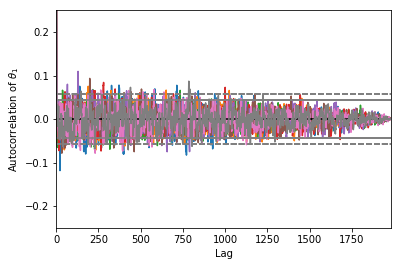

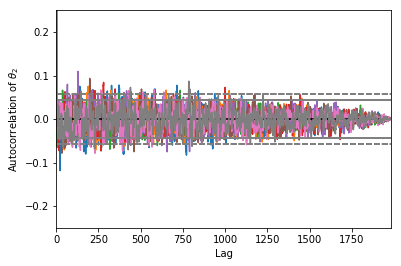

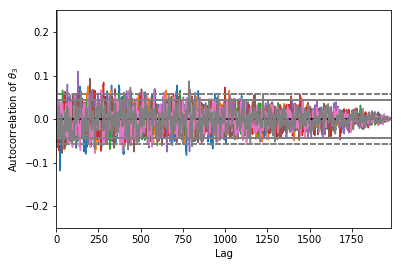

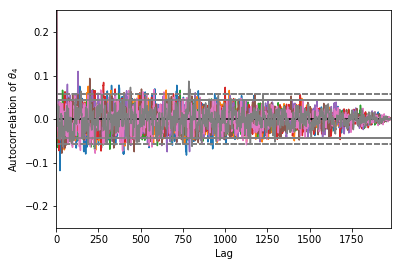

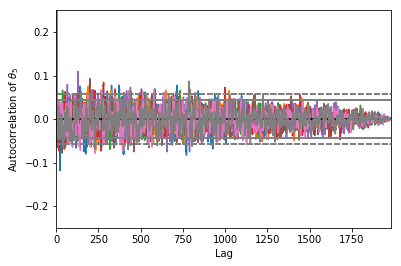

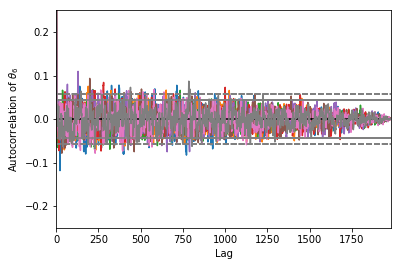

In [12]:
from pandas.tools.plotting import autocorrelation_plot

for ind in range(6):
    for i in range(8):
        autocorrelation_plot(theta[0, :, :][i])
    plt.ylabel('Autocorrelation of $\\theta_%d$' %(ind+1))
    plt.ylim(-0.25, 0.25)
    plt.show()

***

#### Problem 2 - Supernova Cosmology Project

In this homework, we use a compilation of supernovae data to show that the expansion of the universe is accelerating, and hence it contains dark energy. This is the Nobel prize winning research in 2011 (https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/), and Saul Perlmutter, a professor of physics at Berkeley, shared a prize in 2011 for this discovery.
<br><br>
"The expansion history of the universe can be determined quite easily, using as a “standard candle” any distinguishable class of astronomical objects of known intrinsic brightness that can be identified over a wide distance range. As the light from such beacons travels to Earth through an expanding universe, the cosmic expansion stretches not only the distances between galaxy clusters, but also the very wavelengths of the photons en route. By the time the light reaches us, the spectral wavelength $\lambda$ has thus been redshifted by precisely the same incremental factor $z = \Delta \lambda/\lambda$ by which the cosmos has been stretched in the time interval since the light left its source. The recorded redshift and brightness of each such object thus provide a measurement of the total integrated expansion of the universe since the time the light was emitted. A collection of such measurements, over a sufficient range of distances, would yield an entire historical record of the universe’s expansion." (Saul Perlmutter, http://supernova.lbl.gov/PhysicsTodayArticle.pdf).
<br><br>
Supernovae emerge as extremely promising candidates for measuring the cosmic expansion. Type I Supernovae arises from the collapse of white dwarf stars when the Chandrasekhar limit is reached. Such nuclear chain reaction occurs in the same way and at the same mass, the brightness of these supernovae are always the same. The relationship between the apparent brightness and distance of supernovae depend on the contents and curvature of the universe.
<br><br>
We can infer the "luminosity distance" $D_L$ from measuring the inferred brightness of a supernova of luminosity $L$. Assuming a naive Euclidean approach, if the supernova is observed to have flux $F$, then the area over which the flux is distributed is a sphere radius $D_L$, and hence <br><br>
$$F = \frac{L}{4\pi D_L^2}.$$
<br>
In Big Bang cosmology, $D_L$ is given by:
<br><br>
$$ D_L = \frac{\chi(a)}{a} $$
<br>
where $a$ is the scale factor ($\frac{\lambda_0}{\lambda} = 1 + z = \frac{a_0}{a}$, and the quantity with the subscript 0 means the value at present. Note that $a_0 = 1, z_0 = 0$.), and $\chi$ is the comoving distance, the distance between two objects as would be measured instantaneously today. For a photon, $cdt = a(t)d\chi$, so $\chi(t) = c\int_t^{t_0} \frac{dt'}{a(t')}$. We can write this in terms of a Hubble factor ($H(t) = \frac{1}{a}\frac{da}{dt}$), which tells you the expansion rate: $\chi(a) = c\int_a^1 \frac{da'}{a'^2H(a')} = c\int_0^z \frac{dz'}{H(z')}$. (change of variable using $a = \frac{1}{1+z}$.)
<br><br>
Using the Friedmann equation (which basically solves Einstein's equations for a homogenous and isotropic universe), we can write $H^2$ in terms of the mass density $\rho$ of the components in the universe: $H^2(z) = H_0^2[\Omega_m(1+z)^3 + (1-\Omega_m)(1+z)^2].$ <br><br>
$\Omega$ is the density parameter; it is the ratio of the observed density of matter and energy in the universe ($\rho$) to the critical density $\rho_c$ at which the universe would halt is expansion. So $\Omega_0$ (again, the subscript 0 means the value at the present) is the total mass and energy density of the universe today, and consequently $\Omega_0 = \Omega_{m}$ (matter density parameter today; remember we obtained the best-fit value of this parameter in Project 1?) = $\Omega_{\mathrm{baryonoic\ matter}}$ + $\Omega_{\mathrm{dark\ matter}}$. If $\Omega_0 < 1$, the universe will continue to expand forever. If $\Omega_0 > 1$, the expansion will stop eventually and the universe will start to recollapse. If $\Omega_0 = 1$, then the universe is flat and contains enough matter to halt the expansion but not enough to recollapse it. So it will continue expanding, but gradually slowing down all the time, finally running out of steam only in the infinite future. Even including dark matter in this calculation, cosmologists found that all the matters in the universe only amounts to about a quarter of the required critical mass, suggesting a continuously expanding universe with deceleration. Then, using all this, we can write the luminosity distance in terms of the density parameters: <br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.
<br><br>
Fluxes can be expressed in magnitudes $m$, where $m = -2.5\cdot\mathrm{log}_{10}F$ + const. The distance modulus is $\mu = m - M$ ($M$ is the absolute magnitude, the value of $m$ if the supernova is at a distance 10pc. Then, we have:
<br><br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}\Big(D_L\ [in\ the\ unit\ of \ Mpc]\Big)$$
<br><br>
In this assignment, we use the SCP Union2.1 Supernova (SN) Ia compilation. (http://supernova.lbl.gov/union/)
<br><br>
First, load the measured data: $z$ (redshift), $\mu$ (distance modulus), $\sigma(\mu)$ (error on distance modulus)


In [13]:
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

<span style="color:blue"><i> 1. Plot the measured distance modulus as a function of redshift with errorbars. Then, assume three different scenarios: $\Omega_m = 0, 0.3, 1.$  </i></span> <br><br>
Remember:
$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^2]^{1/2}}$$ <br>
$$ \mu = 25 + 5\cdot \mathrm{log}_{10}(D_L)$$ <br><br>
<span style="color:blue"><i> Now, plot three curves of $\mu$ as a function of $z$ for $\Omega_m = 0, 0.3, 1$ on top of the measured data (Calculate $D_L$ using quad. For now, assume $h = 0.7$.) How do they fit? </i></span> <br>


In [14]:
import math

def integrand_DL(z,Omegam):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**2)**(-1/2)

def DL_integrate(z,Omegam):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,))[0]
    return DLval

def mu_model(z,Omegam):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam))
    return mu_model

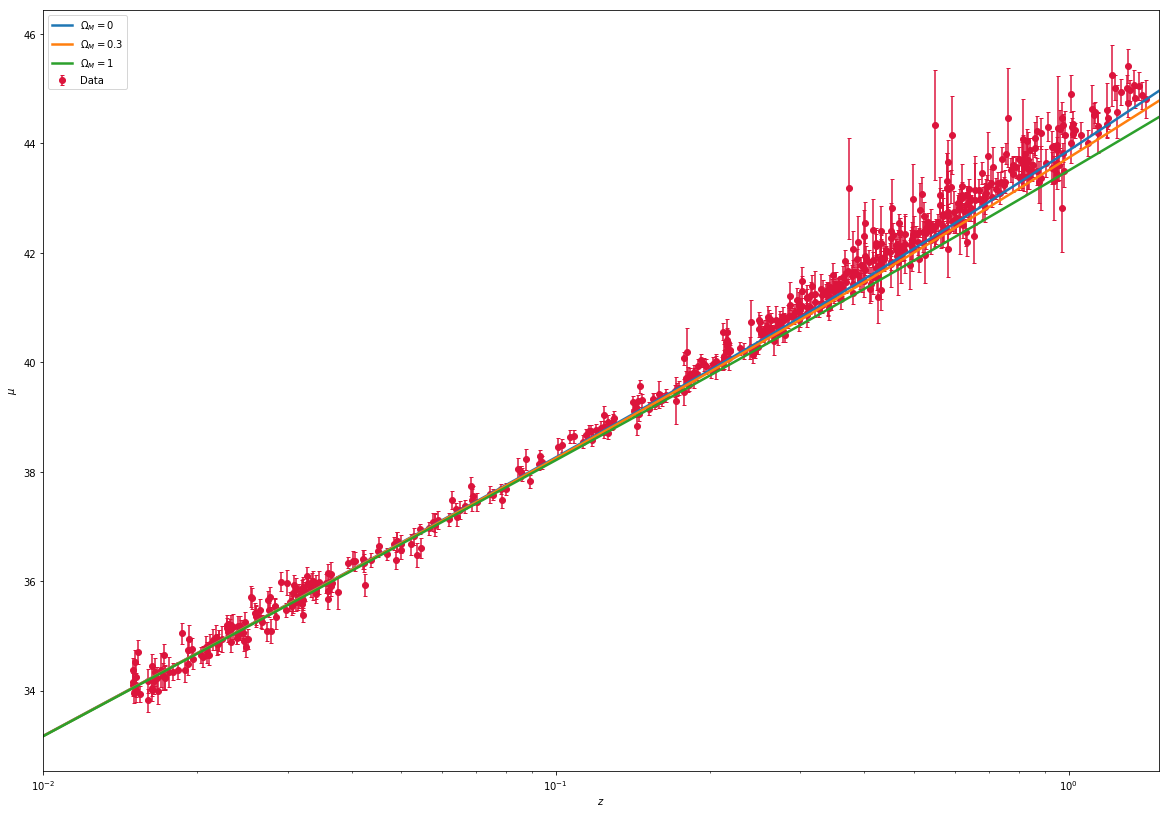

In [15]:
z = np.linspace(0.01, 1.5, 100)
Mu1 = np.zeros(len(z))
Mu2 = np.zeros(len(z))
Mu3 = np.zeros(len(z))

for i in range(len(z)):
    Mu1[i] = mu_model(z[i],0)
    
for i in range(len(z)):
    Mu2[i] = mu_model(z[i],0.3)

for i in range(len(z)):
    Mu3[i] = mu_model(z[i],1)
    
    
plt.figure(figsize = (20,14))

plt.errorbar(z_data, mu_data, yerr = mu_err_data, marker = 'o', mfc='crimson', mec='crimson', ecolor = 'crimson', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Data')

plt.semilogx(z, Mu1, linewidth = 2.5, label = '$\Omega_M = 0$')
plt.semilogx(z, Mu2, linewidth = 2.5, label = '$\Omega_M = 0.3$')
plt.semilogx(z, Mu3, linewidth = 2.5, label = '$\Omega_M = 1$')

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

You should find that the measured data do not fit well to all three scenarios. "The high-redshift supernovae are fainter than would be expected even for an empty cosmos (corresponding to $\Omega_m = 0$)." So what's wrong? 
<br><br>
"If these data are correct, the obvious implication is that the simplest cosmological model must be too simple. The next simplest model might be one that Einstein entertained for a time. Believing the universe to be static, he tentatively introduced into the equations of general relativity an expansionary term he called the “cosmological constant” ($\Lambda$) that would compete against gravitational collapse. After Hubble’s discovery of the cosmic expansion, Einstein famously rejected $\Lambda$ as his “greatest blunder.” In later years, $\Lambda$ came to be identified with the zero-point vacuum energy of all quantum fields. It turns out that invoking a cosmological constant allows us to fit the supernova data quite well." (Saul Perlmutter, https://www.nobelprize.org/nobel_prizes/physics/laureates/2011/)
<br><br>
So in short, the data indicates that faint supernovae are further away from the earth than had been theoretically expected. The expansion rate of the universe is increasing indeed. It seems that some mysterious material (which we call "dark energy") is causing such antigravity effects. The cosmological constant, $\Lambda$, the value of the energy density of the vacuum of space is widely accepted as a leading candidate of dark energy. 
<br><br>
Now let us add a general form of dark energy to our model.
<br><br>
$$H^2(z) = H_0^2[\Omega_m(1+z)^3 + \Omega_{DE}(1+z)^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z)^2].$$ <br> $w$ is the dark energy equation of state, which is the ratio of its pressure to its energy density. $w = -1$ for the cosmological constant $\Lambda$. <br><br>
$\Omega_0 = \Omega_{m}$ (matter density parameter today) + $\Omega_{DE}$ (dark energy density parameter today), and 
<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + \Omega_{DE}(1+z')^{3(1+w)} + (1-\Omega_m-\Omega_{DE})(1+z')^2]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.

<span style="color:blue"> <i> 2. Now assume three different scenarios: ($\Omega_m = 0.3, \Omega_{DE} = 0$), ($\Omega_m = 0, \Omega_{DE} = 1, w = -1$), and ($\Omega_m = 0.3, \Omega_{DE} = 0.7, w = -1$). Again, plot three curves of $\mu$ as a function of $z$ on top of data (assume $h = 0.7$) </i></span><br>


In [16]:
def integrand_DL(z,Omegam,OmegaDE,w):
    return (Omegam*(1+z)**3 + OmegaDE*(1+z)**(3*(1+w)) + (1-Omegam-OmegaDE)*(1+z)**2)**(-1/2)

def DL_integrate(z,Omegam,OmegaDE,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,OmegaDE,w,))[0]
    return DLval

def mu_model(z,Omegam,OmegaDE,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,OmegaDE,w))
    return mu_model

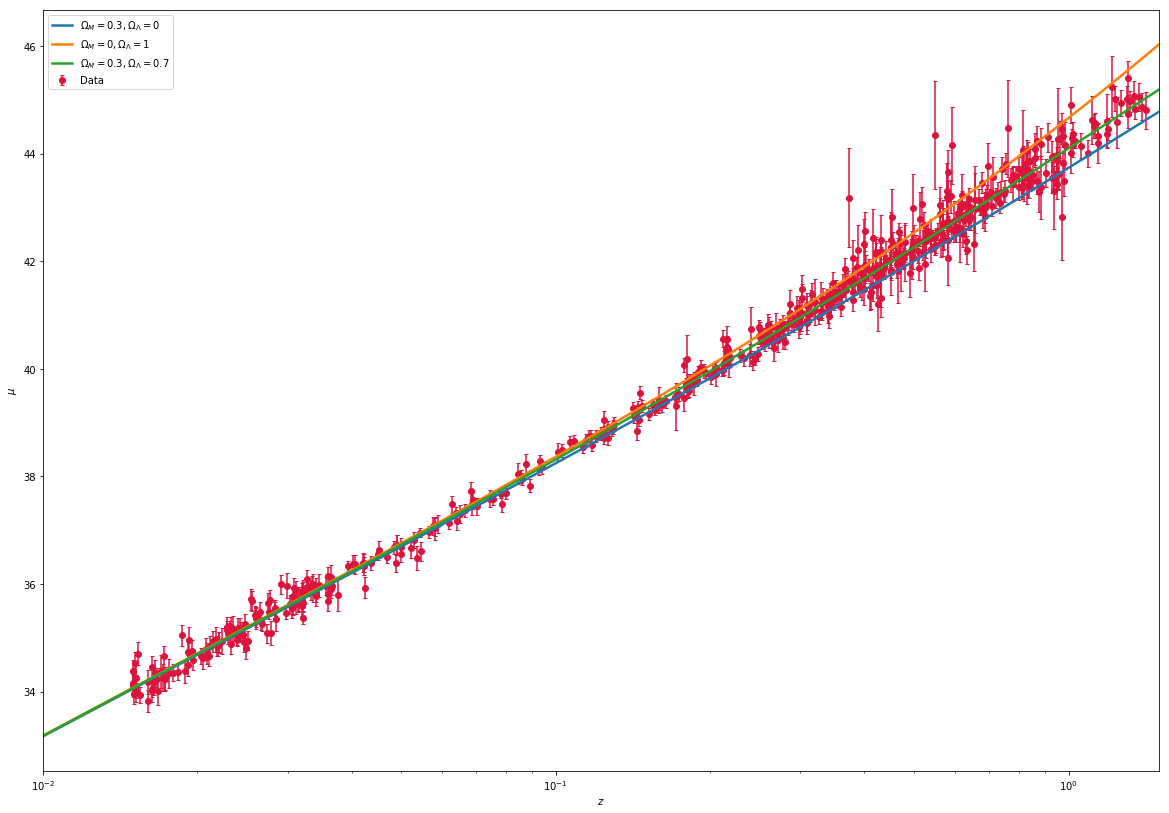

In [17]:
z = np.linspace(0.01, 1.5, 100)
Mu1 = np.zeros(len(z))
Mu2 = np.zeros(len(z))
Mu3 = np.zeros(len(z))

for i in range(len(z)):
    Mu1[i] = mu_model(z[i],0.3, 0, 0)
    
for i in range(len(z)):
    Mu2[i] = mu_model(z[i],0, 1., -1)

for i in range(len(z)):
    Mu3[i] = mu_model(z[i],0.3, 0.7, -1)
    
plt.figure(figsize = (20,14))

plt.errorbar(z_data, mu_data, yerr = mu_err_data, marker = 'o', mfc='crimson', mec='crimson', ecolor = 'crimson', elinewidth = 1.5, barsabove = True, capsize = 2.0,  linestyle = 'None', label = 'Data')

plt.semilogx(z, Mu1, linewidth = 2.5, label = '$\Omega_M = 0.3, \Omega_{\Lambda} = 0$')
plt.semilogx(z, Mu2, linewidth = 2.5, label = '$\Omega_M = 0, \Omega_{\Lambda} = 1$')
plt.semilogx(z, Mu3, linewidth = 2.5, label = '$\Omega_M = 0.3, \Omega_{\Lambda} = 0.7$')

plt.legend()
plt.xlim(0.01, 1.5)
plt.xlabel('$z$')
plt.ylabel('$\mu$')
plt.show()

You basically reproduced the below figure!
![alt text](SN.png "Title")
You should see that $\Omega_m = 0.3$ and $\Omega_m = 0.7$ fits the data best. In combination with the CMB data, this shows that about 70% of the total energy density is vacuum energy and 30% is mass.
***
Now, with measurements of the distance modulus $\mu$, use Bayesian analysis to estimate the cosmological parameters.
<br><br>
let us assume that the universe is flat (which is a fair assumption since the CMB measurements indicate that the universe has no large-scale curvature). $\Omega_0 = \Omega_m + \Omega_{DE} = 1$. Then, we do not need to worry about the curvature term:<br><br>
$$ D_L = \frac{\chi(a)}{a} = c(1+z)\int_0^z \frac{dz'}{H(z')} = c(1+z)\int_0^z \frac{dz'}{H_0[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}  $$ <br>
$$ = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$.<br><br>
Assuming that errors are Gaussian (can be justified by averaging over large numbers of SN; central limit theorem), we calculate the likelihood $L$ as: <br><br>
$$ L \propto \mathrm{exp}\Big( -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} \Big) $$
<br>
where $z_i, \mu_i, \sigma(\mu_i)$ are from the measurements, and we compute $\mu_{model}$ as a function of $z, \Omega_m, w$.

***

Next, write an MCMC code using the <b>Metropolis algorithm</b>. 

Now, assume a more general form of dark energy. (Do not fix $w$ to -1; add $w$ as a parameter.)

In the flat universe, <br><br>

$$ D_L = \frac{2997.92458}{h} (1+z)\int_0^z \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}}\ [unit\ of\ Mpc] $$
<br>
where $H_0 = 100\cdot h\ [km\cdot s^{-1} Mpc^{-1}]$. Here, we fix $h = 0.7$.<br><br>
We calculate the likelihood $L$ as: <br><br>
$$ \mathrm{ln}(L) \approx -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{[\mu_{i,\ data}(z_i) - \mu_{i,\ model}(z_i, \Omega_m, w)]^2}{\sigma(\mu_i)^2} = -\frac{1}{2} \sum_{i = 1}^{N_{\mathrm{SN}}} \frac{\Delta \mu_i^2}{\sigma(\mu_i)^2} $$
<br>
where $$ \mu_{i,\ model}(z_i, \Omega_m, w) = 25 + 5\cdot \mathrm{log}_{10}(D_{L,\ i})$$<br>
$$ D_{L,\ i} = \frac{2997.92458}{0.7} (1+z_i)\int_0^{z_i} \frac{dz'}{[\Omega_m(1+z')^3 + (1-\Omega_m)(1+z')^{3(1+w)}]^{1/2}} $$
<br><br>
<span style="color:blue"> <i> 6. Run the MCMC code to estimate $w$ and $\Omega_m$. Plot 1-d posterior of $w$ and $\Omega_m$ as well as 2-d posterior (i.e. plot the chain in two-dimensional parameter space. Make sure that the chain has converged (you can change nsamples, nburn).  </i></span><br><br>

Hint:

Set the length of MCMC chains to be 15,000 (or even more if you think that the chain has not yet converged.) In the end, you should throw away the first 20% of the chain as burn-in. (20% is an arbitrary number. You can plot the chain and estimate the burn-in period.)

Then, set the random initial point in the parameter space $(w, \Omega_m)$: let $w$ be negative and $\Omega_m$ be positive and draw a random number using np.random.uniform(). Set initial likelihood to low value (e.g. -1.e100) so that next point is accepted.

Now, draw a new sample starting from this random initial point. Here we assume that the proposal distribution is Gaussian with arbitrary width: in this problem, we assume that $\sigma = 0.01$ (This determines how far you propose jumps.) for distributions for both $w, \Omega_m$.

For example, say that you start with $(w, \Omega_m)$ = $(-0.3, 0.7)$. Then, draw a new sample of $w$ from a Gaussian with $\mu = -0.3, \sigma = 0.01$ and a new sample of $\Omega_m$ from a Gaussian with $\mu = -0.7, \sigma = 0.01$.

Now, evaluate the log likelihood value of this new point.

If the value has gone up, accept the point.

Otherwise, accept it with probability given by ratio of likelihoods:
Draw a random number from a uniform distribution between 0 and 1 ( $\alpha$ = np.random.uniform() ). If the ratio $ln(\frac{L_{new}}{L_{old}})$ is greater than $ln(\alpha)$ (i.e. $\frac{L_{new}}{L_{old}} > \alpha$), then accept it. Otherwise, reject it and stay at your old point.

Repeat this 15,000 times (the length of chain) and plot the distributions of $(w, \Omega_m)$.

In [18]:
# Import data
data = np.loadtxt("sn_z_mu_dmu_plow_union2.1.txt", usecols=range(1,5))
# z
z_data = data[:,0]
# mu
mu_data = data[:,1]
# error on mu (sigma(mu))
mu_err_data = data[:,2]

# length of MCMC chains
nsamples = 15000
# number of parameters: Omega_m and w
npars    = 2

# Define (gaussian) width of the proposal distribution, one for each parameter. This determines how far you propose jumps
Sigma = [0.01, 0.01]

# Number of supernova:
nSN = len(z_data)

# Declare an empty array of the parameter values of each point. 
# Theta[:,0] stores a trace of the parameter \Omega_m  
# Theta[:,1] stores a trace of the parameter w 
# Theta[:,2] stores log-likelihood values at each point
Theta = np.empty([nsamples,npars+1])

# Dmu stores mu(data)-mu(theory), temporarily:
Dmu = np.empty(nSN)

# Random starting point in parameter space
# Set initial likelihood to low value so next point is accepted (could compute it instead):
Theta[0,:] = [np.random.uniform(), -np.random.uniform(), -1.e100]

In [19]:
# Define mu from theory
def integrand_DL(z,Omegam,w):
    return (Omegam*(1+z)**3 + (1-Omegam)*(1+z)**(3*(1+w)))**(-1/2)
            
def DL_integrate(z,Omegam,w):
    DLval = 2997.92458/0.7*(1.0+z)*quad(integrand_DL, 0, z, args = (Omegam,w,))[0]
    return DLval

def mu_model(z,Omegam,w):
    mu_model = 25.0 + 5.0*math.log10(DL_integrate(z,Omegam,w))
    return mu_model



10 percent done
20 percent done
30 percent done
40 percent done
50 percent done
60 percent done
70 percent done
80 percent done
90 percent done


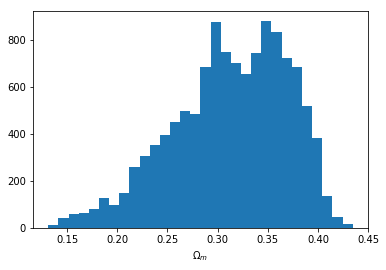

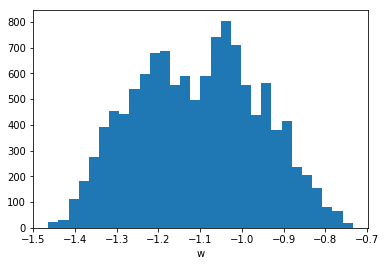

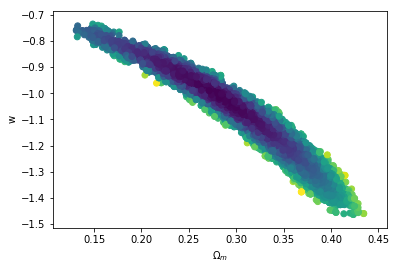

Omega_m =  0.3126000795330148 +/- 0.05731641005422171
w =  -1.106604523055033 +/- 0.14882723191485436


In [20]:
# Define the likelihood function:

def lnL(Omegam, w):

    # Treat unphysical regions by setting likelihood to (almost) zero:    
    if(Omegam<=0 or w>=0):
        lnL = -1.e100
    else:
            
    # Compute difference with theory mu at redshifts of the SN, for trial Omegam
        for j in range (nSN):
            Dmu[j] = mu_data[j]-mu_model(z_data[j],Omegam,w)

    # Compute ln(likelihood) assuming gaussian errors
        lnL = -0.5*sum((Dmu/mu_err_data)**2)
        
    return lnL


# Draw new proposed samples from a proposal distribution, centred on old values Omegam[i-1]
# Accept or reject, and colour points according to ln(likelihood):

# Compute initial likelihood value:
Theta[0,npars] = lnL(Theta[0,0], Theta[0,1])

progress = nsamples/10; val = 0
for i in range(1,nsamples):    
    
    if i%progress == 0:
        val = val + 10
        print("%d percent done" %val)
    
    lnLPrevious = Theta[i-1,npars]
    OmegamProp = np.random.normal(Theta[i-1,0],Sigma[0])
    wProp = np.random.normal(Theta[i-1,1],Sigma[1])
    
    lnLProp    = lnL(OmegamProp, wProp)

    # Metroplis-Hastings algorithm:

    if(lnLProp > lnLPrevious):
    # Accept point if likelihood has gone up:
        Theta[i,0]     = OmegamProp
        Theta[i,1]     = wProp
        Theta[i,npars] = lnLProp
    else:
    # Otherwise accept it with probability given by ratio of likelihoods:
        alpha = np.random.uniform()
    
        if(lnLProp - lnLPrevious > np.log(alpha)):
            Theta[i,0]     = OmegamProp
            Theta[i,1]     = wProp
            Theta[i,npars] = lnLProp
        else:
        # Reject; Repeat the previous point in the chain:
            Theta[i,0:2]     = Theta[i-1,0:2]
            Theta[i,npars] = lnLPrevious

# Remove a burn in period, arbitrarily chosen to be the first 20% of the chain:
nburn = 2*math.floor(nsamples/10)
    

# Plot the histogram of Omegam after the burn-in phase:
plt.hist(Theta[nburn:,0],bins=30)
plt.xlabel(r'$\Omega_m$')
plt.show()

# Plot the histogram of w after the burn-in phase:
plt.hist(Theta[nburn:,1],bins=30)
plt.xlabel('w')
plt.show()

# Scatter plot of the samples (2-d posterior):
plt.scatter(Theta[nburn:,0], Theta[nburn:,1], c = -Theta[nburn:,npars])
plt.xlabel(r'$\Omega_m$')
plt.ylabel('w')
plt.show() 

# Print best-fit values and constraints
print ('Omega_m = ',np.mean(Theta[nburn:nsamples,0]), '+/-' ,np.std(Theta[nburn:nsamples,0]))
print ('w = ',np.mean(Theta[nburn:nsamples,1]), '+/-' ,np.std(Theta[nburn:nsamples,1]))


***

## To Submit
Execute the following cell to submit.
If you make changes, execute the cell again to resubmit the final copy of the notebook, they do not get updated automatically.<br>
__We recommend that all the above cells should be executed (their output visible) in the notebook at the time of submission.__ <br>
Only the final submission before the deadline will be graded. 


In [ ]:
_ = ok.submit()